In [350]:
import pandas as pd
from WindPy import w
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [147]:
DATA_DIR = 'D:Data/fund/history/'
stock_funds_file = u'D:Data/fund/股票型基金列表.xlsx'
mixed_funds_file = u'D:Data/fund/混合型基金列表.xlsx'
bond_funds_files = u'D:Data/fund/债券型基金列表.xlsx'
RPT_DIR = 'D:Data/fund/rpt/'
COMP_DIR = 'D:Data/fund/comp/'

In [66]:
stock_df = pd.read_excel(stock_funds_file)
mixed_df = pd.read_excel(mixed_funds_file)
bond_df = pd.read_excel(bond_funds_files)

In [67]:
all_df = stock_df.append(mixed_df).append(bond_df)

In [68]:
comps = all_df['mgrcomp'].unique()

In [69]:
for c in comps:
    print c

嘉实基金管理有限公司
财通基金管理有限公司
华夏基金管理有限公司
国联安基金管理有限公司
汇添富基金管理股份有限公司
摩根士丹利华鑫基金管理有限公司
景顺长城基金管理有限公司
华安基金管理有限公司
鹏华基金管理有限公司
上投摩根基金管理有限公司
富国基金管理有限公司
建信基金管理有限责任公司
安信基金管理有限责任公司
前海开源基金管理有限公司
国寿安保基金管理有限公司
大成基金管理有限公司
招商基金管理有限公司
国海富兰克林基金管理有限公司
工银瑞信基金管理有限公司
广发基金管理有限公司
泰达宏利基金管理有限公司
华润元大基金管理有限公司
华宝兴业基金管理有限公司
民生加银基金管理有限公司
农银汇理基金管理有限公司
易方达基金管理有限公司
南方基金管理有限公司
天弘基金管理有限公司
诺安基金管理有限公司
中银基金管理有限公司
新华基金管理股份有限公司
光大保德信基金管理有限公司
华泰柏瑞基金管理有限公司
信达澳银基金管理有限公司
汇丰晋信基金管理有限公司
银华基金管理股份有限公司
金鹰基金管理有限公司
中金基金管理有限公司
博时基金管理有限公司
国泰基金管理有限公司
泓德基金管理有限公司
圆信永丰基金管理有限公司
宝盈基金管理有限公司
中欧基金管理有限公司
东海基金管理有限责任公司
创金合信基金管理有限公司
长盛基金管理有限公司
申万菱信基金管理有限公司
中融基金管理有限公司
浙江浙商证券资产管理有限公司
新疆前海联合基金管理有限公司
平安大华基金管理有限公司
交银施罗德基金管理有限公司
益民基金管理有限公司
国投瑞银基金管理有限公司
银河基金管理有限公司
融通基金管理有限公司
万家基金管理有限公司
长城基金管理有限公司
海富通基金管理有限公司
泰信基金管理有限公司
兴全基金管理有限公司
信诚基金管理有限公司
诺德基金管理有限公司
东吴基金管理有限公司
浦银安盛基金管理有限公司
浙商基金管理有限公司
方正富邦基金管理有限公司
德邦基金管理有限公司
中海基金管理有限公司
华富基金管理有限公司
长信基金管理有限责任公司
西部利得基金管理有限公司
国金基金管理有限公司
中邮创业基金管理股份有限公司
长安基金管理有限公司
华商基金管理有限公司
英大基金管理有限公司
上海东方证券资产管理有限公司
上银基金管理有限公司
红塔红土基金管理有限公司
富安达基金管理有限公司
中信建投

In [70]:
c = u'嘉实基金管理有限公司'

In [71]:
df = all_df[all_df['mgrcomp'] == c]

In [72]:
df.shape

(115, 8)

In [73]:
df.head()

,sec_name,wind_code,investtype,issue_date,netasset,mgrcomp,fundmanager,fund_status
0,嘉实中证500ETF联接,000008.OF,被动指数型基金,2013-02-21 00:00:00.005,7.030063e+08,嘉实基金管理有限公司,"陈正宪,何如",开放申购|开放赎回
4,嘉实研究阿尔法,000082.OF,普通股票型基金,2013-05-02 00:00:00.005,5.501717e+08,嘉实基金管理有限公司,张露,开放申购|开放赎回
5,嘉实沪深300增强,000176.OF,增强指数型基金,2014-12-04 00:00:00.005,4.551476e+08,嘉实基金管理有限公司,"李欣,张露",开放申购|开放赎回
34,嘉实医疗保健,000711.OF,普通股票型基金,2014-07-14 00:00:00.005,1.623984e+09,嘉实基金管理有限公司,齐海滔,开放申购|开放赎回
37,嘉实新兴产业,000751.OF,普通股票型基金,2014-08-18 00:00:00.005,3.912230e+08,嘉实基金管理有限公司,季文华,开放申购|开放赎回


In [75]:
df = df.set_index('wind_code')

In [76]:
dic = {}
for code in df.index:
    fname = '%s/%s.xlsx'%(RPT_DIR, code)
    temp = pd.read_excel(fname, index_col=0)
    dic[code] = temp
pnl = pd.Panel(dic)

In [77]:
pnl

<class 'pandas.core.panel.Panel'>
Dimensions: 115 (items) x 30 (major_axis) x 5 (minor_axis)
Items axis: 000005.OF to 960025.OF
Major_axis axis: 2010-03-31 00:00:00 to 2017-06-30 00:00:00
Minor_axis axis: prt_netasset to prt_stocktoasset

In [78]:
sdf = pnl.minor_xs('prt_stocktonav')

In [79]:
series = sdf.iloc[-1]

In [122]:
funds = series[series > 60].index.tolist()

In [123]:
len(funds)

50

In [85]:
weight = pnl.minor_xs('prt_netasset')[funds].iloc[-1]

In [88]:
weight = weight.dropna()

In [104]:
weight = weight / weight.sum()

In [89]:
funds = weight.index.tolist()

In [90]:
for f in funds:
    print f, df.loc[f]['sec_name']

000082.OF 嘉实研究阿尔法
000176.OF 嘉实沪深300增强
000595.OF 嘉实泰和
000711.OF 嘉实医疗保健
000751.OF 嘉实新兴产业
000870.OF 嘉实新收益
000985.OF 嘉实逆向策略
001036.OF 嘉实企业变革
001039.OF 嘉实先进制造
001044.OF 嘉实新消费
001416.OF 嘉实事件驱动
001577.OF 嘉实低价策略
001616.OF 嘉实环保低碳
001637.OF 嘉实腾讯自选股大数据
001758.OF 嘉实研究增强
001759.OF 嘉实成长增强
001878.OF 嘉实沪港深精选
002168.OF 嘉实智能汽车
003053.OF 嘉实文体娱乐A
003054.OF 嘉实文体娱乐C
003298.OF 嘉实物流产业A
003299.OF 嘉实物流产业C
003634.OF 嘉实农业产业
003984.OF 嘉实新能源新材料A
003985.OF 嘉实新能源新材料C
004355.OF 嘉实丰和
004477.OF 嘉实沪港深回报
070001.OF 嘉实成长收益A
070003.OF 嘉实稳健
070006.OF 嘉实服务增值行业
070011.OF 嘉实策略增长
070013.OF 嘉实研究精选A
070017.OF 嘉实量化阿尔法
070018.OF 嘉实回报灵活配置
070019.OF 嘉实价值优势
070021.OF 嘉实主题新动力
070022.OF 嘉实领先成长
070027.OF 嘉实周期优选
070032.OF 嘉实优化红利
070099.OF 嘉实优质企业
159910.OF 嘉实深证基本面120ETF
159918.OF 嘉实中创400ETF
159919.OF 嘉实沪深300ETF
159922.OF 嘉实中证500ETF
160716.OF 嘉实基本面50
512600.OF 嘉实中证主要消费ETF
512610.OF 嘉实中证医药卫生ETF
512640.OF 嘉实中证金融地产ETF
960024.OF 嘉实成长收益H


In [100]:
d

In [107]:
(fdf.iloc[-1] / fdf.iloc[0] * weight).sum() - 1

0.046117927178679796

In [118]:
(fdf.std() * weight).sum()

0.03692854629341867

In [447]:
c = u'南方基金管理有限公司'

In [468]:
fname = u'%s/%s.xlsx'%(COMP_DIR, c)

In [469]:
df = pd.read_excel(fname, index_col=0)

In [470]:
df = df.pct_change()

In [471]:
pnl = pd.read_pickle(u'D:Data/fund/comp_rpt/%s.pkl'%(c))

In [472]:
pnl.minor_axis

Index([u'prt_netasset', u'prt_stocktonav', u'prt_bondtonav', u'prt_cashtonav',
       u'prt_stocktoasset'],
      dtype='object')

In [473]:
st2nav = pnl.minor_xs('prt_stocktonav')

In [474]:
weight_df1 = pnl.minor_xs('prt_netasset')

In [475]:
weight_df1 = weight_df1[st2nav > 60]

In [476]:
weight_df1 = weight_df1.fillna(0)

In [477]:
weight_zero_df = pd.DataFrame(index=df.index, columns=df.columns)

In [478]:
weight_df2 = weight_zero_df.append(weight_df1).sort_index()

In [479]:
weight_df2 = weight_df2.fillna(method='ffill').loc[df.index]

In [480]:
weight_df2 = weight_df2[~weight_df2.index.duplicated(keep='first')]

In [481]:
weight_df2 = weight_df2 * (1 + df)

In [482]:
weight_df2 = weight_df2.div(weight_df2.sum(axis=1), axis='index')

In [483]:
ret_df = weight_df2 * df

In [484]:
ret = ret_df.sum(axis=1)

In [492]:
df.tail()

,000022.OF,000023.OF,000086.OF,000326.OF,000327.OF,000355.OF,000356.OF,000452.OF,000527.OF,000554.OF,...,512310.OF,512330.OF,512340.OF,512900.OF,960020.OF,960040.OF,F000355.OF,F202003.OF,F202017.OF,F202108.OF
2017-09-04,-0.000260,-0.000262,0.00000,0.000958,0.000924,0.000000,0.000000,0.003340,-0.000442,0.003891,...,0.009321,0.014604,0.005538,-0.003596,0.002886,NaN,NaN,NaN,NaN,NaN
2017-09-05,-0.000433,-0.000437,0.00000,0.000000,0.000923,0.000000,0.000000,0.003995,0.006195,0.000000,...,0.006296,0.000813,-0.003245,-0.003701,0.006475,NaN,NaN,NaN,NaN,NaN
2017-09-06,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2017-09-07,-0.000087,-0.000088,0.00101,-0.000957,-0.000923,0.000000,0.000000,-0.003316,-0.005277,-0.001292,...,-0.000139,-0.002552,-0.004736,-0.015325,0.001430,NaN,NaN,NaN,NaN,NaN
2017-09-08,0.000953,0.000963,0.00000,0.000958,0.000923,0.000913,0.000923,0.000000,0.002210,-0.001294,...,0.000417,0.000233,0.006840,-0.004056,-0.003569,NaN,NaN,NaN,NaN,NaN


In [486]:
acc = (1 + ret).cumprod()

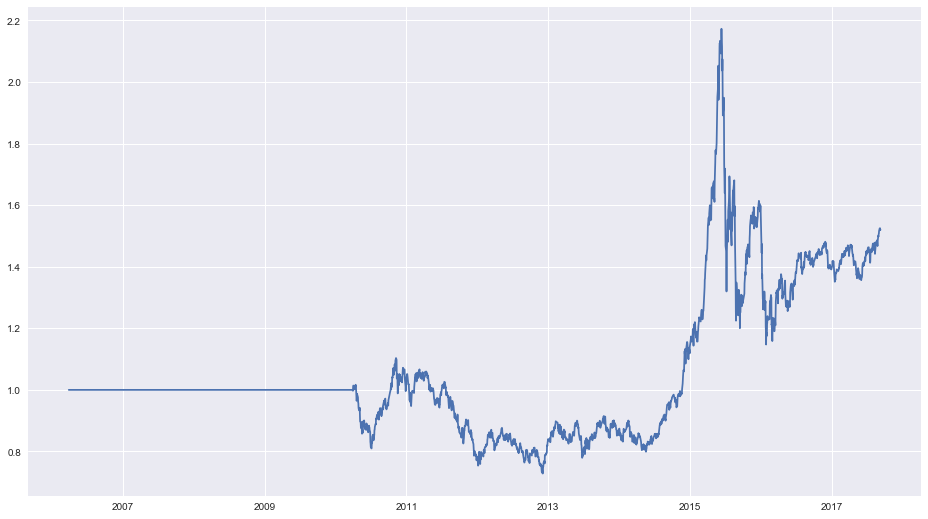

In [487]:
plt.figure(figsize=(16, 9))
plt.plot(acc)

In [353]:
df = pd.read_excel('D:Data/stocks/000402.SZ.xlsx', index_col=0)

In [355]:
df[df.index >= '2010-01-01']

,amt,close,dealnum,high,low,mfd_buyamt_a,mfd_sellamt_a,mkt_freeshares,pe_ttm,turnover,volume,vwap
2010-04-01,486305554.1,7.385727,NaN,7.418378,7.209410,NaN,NaN,2.060609e+10,17.342312,0.023600,43282635.0,7.337129
2010-04-02,580662714.6,7.548983,NaN,7.594695,7.405318,NaN,NaN,2.106158e+10,17.725653,0.027570,50423795.0,7.520021
2010-04-06,498358468.4,7.411848,NaN,7.607756,7.353075,NaN,NaN,2.067897e+10,20.621643,0.024100,43748557.0,7.438900
2010-04-07,377777708.0,7.274712,NaN,7.405318,7.215940,NaN,NaN,2.029636e+10,20.240097,0.018613,33930791.0,7.270646
2010-04-08,436313277.1,7.131047,NaN,7.307364,7.091865,NaN,NaN,1.989554e+10,19.840382,0.021930,39691388.0,7.178485
2010-04-09,313989267.3,7.176758,NaN,7.209410,7.091865,NaN,NaN,2.002307e+10,19.967564,0.015681,28686141.0,7.147815
2010-04-12,643624264.8,6.902487,NaN,7.183289,6.804533,NaN,NaN,1.925786e+10,19.204472,0.033421,60443681.0,6.953639
2010-04-13,355871947.6,6.948199,NaN,6.993911,6.791473,NaN,NaN,1.938539e+10,19.331654,0.018358,33638928.0,6.908476
2010-04-14,219860281.8,6.974320,NaN,6.974320,6.863306,NaN,NaN,1.945827e+10,19.404329,0.011299,20755532.0,6.917410
2010-04-15,427902205.2,6.811064,NaN,6.922078,6.784943,NaN,NaN,1.900279e+10,18.950108,0.022518,40948795.0,6.823922
